# Advanced Regression
## House Price Prediction

#### Problem Statement:

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the American market.

## Reading and Understanding the Data

Let us first import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [110]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [111]:
df = pd.read_csv("train.csv")

In [112]:
# Check the head of the dataset
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  MiscVal  MoSold  YrSold SaleType SaleCondition  SalePrice
0   1          60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ         706          Unf           0        150          856    GasA        Ex          Y      SBrkr       856       854             0       1710             1             0         2         1             3             1          Gd             8        Typ           0         NaN     Attchd     2003.000          RFn           2         548         TA         TA          Y           0           61              0          0            0         0    NaN   NaN         NaN        0       2    2008       WD        Normal     208500
1   2          20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd        NaN       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ         978          Unf           0        284         1262    GasA        Ex          Y      SBrkr      1262         0             0       1262             0             1         2         0             3             1          TA             6        Typ           1          TA     Attchd     1976.000          RFn           2         460         TA         TA          Y         298            0              0          0            0         0    NaN   NaN         NaN        0       5    2007       WD        Normal     181500
2   3          60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ         486          Unf           0        434          920    GasA        Ex          Y      SBrkr       920       866             0       1786             1             0         2         1             3             1          Gd             6        Typ           1          TA     Attchd     2001.000          RFn           2         608         TA         TA          Y           0           42              0          0            0         0    NaN   NaN         NaN        0       9    2008       WD        Normal     223500
3   4          70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng        NaN       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ         216          Unf           0        540          756   

`Id` column is unnecessary, hence removing it.

In [113]:
df.drop(['Id'], axis=1, inplace=True)

In [114]:
df.shape

(1460, 80)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [116]:
# checking numerical columns
df.describe()

MSSubClass  LotFrontage    LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal   MoSold   YrSold  SalePrice
count    1460.000     1201.000   1460.000     1460.000     1460.000   1460.000      1460.000    1452.000    1460.000    1460.000   1460.000     1460.000  1460.000  1460.000      1460.000   1460.000      1460.000      1460.000  1460.000  1460.000      1460.000      1460.000      1460.000    1460.000     1379.000    1460.000    1460.000    1460.000     1460.000       1460.000   1460.000     1460.000  1460.000  1460.000 1460.000 1460.000   1460.000
mean       56.897       70.050  10516.828        6.099        5.575   1971.268      1984.866     103.685     443.640      46.549    567.240     1057.429  1162.627   346.992         5.845   1515.464         0.425         0.058     1.565     0.383         2.866         1.047         6.518       0.613     1978.506       1.767     472.980      94.245       46.660         21.954      3.410       15.061     2.759    43.489    6.322 2007.816 180921.196
std        42.301       24.285   9981.265        1.383        1.113     30.203        20.645     181.066     456.098     161.319    441.867      438.705   386.588   436.528        48.623    525.480         0.519         0.239     0.551     0.503         0.816         0.220         1.625       0.645       24.690       0.747     213.805     125.339       66.256         61.119     29.317       55.757    40.177   496.123    2.704    1.328  79442.503
min        20.000       21.000   1300.000        1.000        1.000   1872.000      1950.000       0.000       0.000       0.000      0.000        0.000   334.000     0.000         0.000    334.000         0.000         0.000     0.000     0.000         0.000         0.000         2.000       0.000     1900.000       0.000       0.000       0.000        0.000          0.000      0.000        0.000     0.000     0.000    1.000 2006.000  34900.000
25%        20.000       59.000   7553.500        5.000        5.000   1954.000      1967.000       0.000       0.000       0.000    223.000      795.750   882.000     0.000         0.000   1129.500         0.000         0.000     1.000     0.000         2.000         1.000         5.000       0.000     1961.000       1.000     334.500       0.000        0.000          0.000      0.000        0.000     0.000     0.000    5.000 2007.000 129975.000
50%        50.000       69.000   9478.500        6.000        5.000   1973.000      1994.000       0.000     383.500       0.000    477.500      991.500  1087.000     0.000         0.000   1464.000         0.000         0.000     2.000     0.000         3.000         1.000         6.000       1.000     1980.000       2.000     480.000       0.000       25.000          0.000      0.000        0.000     0.000     0.000    6.000 2008.000 163000.000
75%        70.000       80.000  11601.500        7.000        6.000   2000.000      2004.000     166.000     712.250       0.000    808.000     1298.250  1391.250   728.000         0.000   1776.750         1.000         0.000     2.000     1.000         3.000         1.000         7.000       1.000     2002.000       2.000     576.000     168.000       68.000          0.000      0.000        0.000     0.000     0.000    8.000 2009.000 214000.000
max       190.000      313.000 215245.000       10.000        9.000   2010.000      2010.000    1600.000    5644.000    1474.000   2336.000     6110.000  4692.000  2065.000       572.000   5642.000         3.000         2.000     3.000     2.000         8.000         3.000        14.000       3.000     2010.000       4.000    1418.000     857.000      547.000        552.000    508.000      480.000   738.

In [117]:
# percentage null values in each column
round(df.isnull().sum()/len(df.index)*100,2).sort_values(ascending=False)[round(df.isnull().sum()/len(df.index),2) > 0]

PoolQC         99.520
MiscFeature    96.300
Alley          93.770
Fence          80.750
MasVnrType     59.730
FireplaceQu    47.260
LotFrontage    17.740
GarageYrBlt     5.550
GarageCond      5.550
GarageType      5.550
GarageFinish    5.550
GarageQual      5.550
BsmtExposure    2.600
BsmtFinType2    2.600
BsmtCond        2.530
BsmtQual        2.530
BsmtFinType1    2.530
MasVnrArea      0.550
dtype: float64

In [118]:
# columns with more than 10% missing values
round(df.isnull().sum()/len(df.index), 2)[round(df.isnull().sum()/len(df.index), 2).values > 0.10]

LotFrontage   0.180
Alley         0.940
MasVnrType    0.600
FireplaceQu   0.470
PoolQC        1.000
Fence         0.810
MiscFeature   0.960
dtype: float64

In [119]:
# dropping columns with high % of null values
df.drop(['LotFrontage', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis=1, inplace=True)

In [120]:
# checking null percentage for each column
df.isnull().sum().sort_values(ascending=False)/len(df.index)

GarageType      0.055
GarageYrBlt     0.055
GarageFinish    0.055
GarageQual      0.055
GarageCond      0.055
BsmtFinType2    0.026
BsmtExposure    0.026
BsmtQual        0.025
BsmtCond        0.025
BsmtFinType1    0.025
MasVnrArea      0.005
Electrical      0.001
KitchenAbvGr    0.000
BedroomAbvGr    0.000
HalfBath        0.000
FullBath        0.000
BsmtHalfBath    0.000
BsmtFullBath    0.000
KitchenQual     0.000
GrLivArea       0.000
TotRmsAbvGrd    0.000
Functional      0.000
MSSubClass      0.000
Fireplaces      0.000
ScreenPorch     0.000
SaleCondition   0.000
SaleType        0.000
YrSold          0.000
MoSold          0.000
MiscVal         0.000
PoolArea        0.000
3SsnPorch       0.000
2ndFlrSF        0.000
EnclosedPorch   0.000
OpenPorchSF     0.000
WoodDeckSF      0.000
PavedDrive      0.000
GarageArea      0.000
GarageCars      0.000
LowQualFinSF    0.000
HeatingQC       0.000
1stFlrSF        0.000
CentralAir      0.000
LotArea         0.000
Street          0.000
LotShape  

Few columns still have null values, but since it's less than 10%, we can drop the rows.

In [121]:
df.dropna(inplace=True)

In [122]:
df.shape

(1338, 73)

## Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- Visualizing data and understanding relationships using plots
- Here's where we'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

### Visualising Numeric Variables

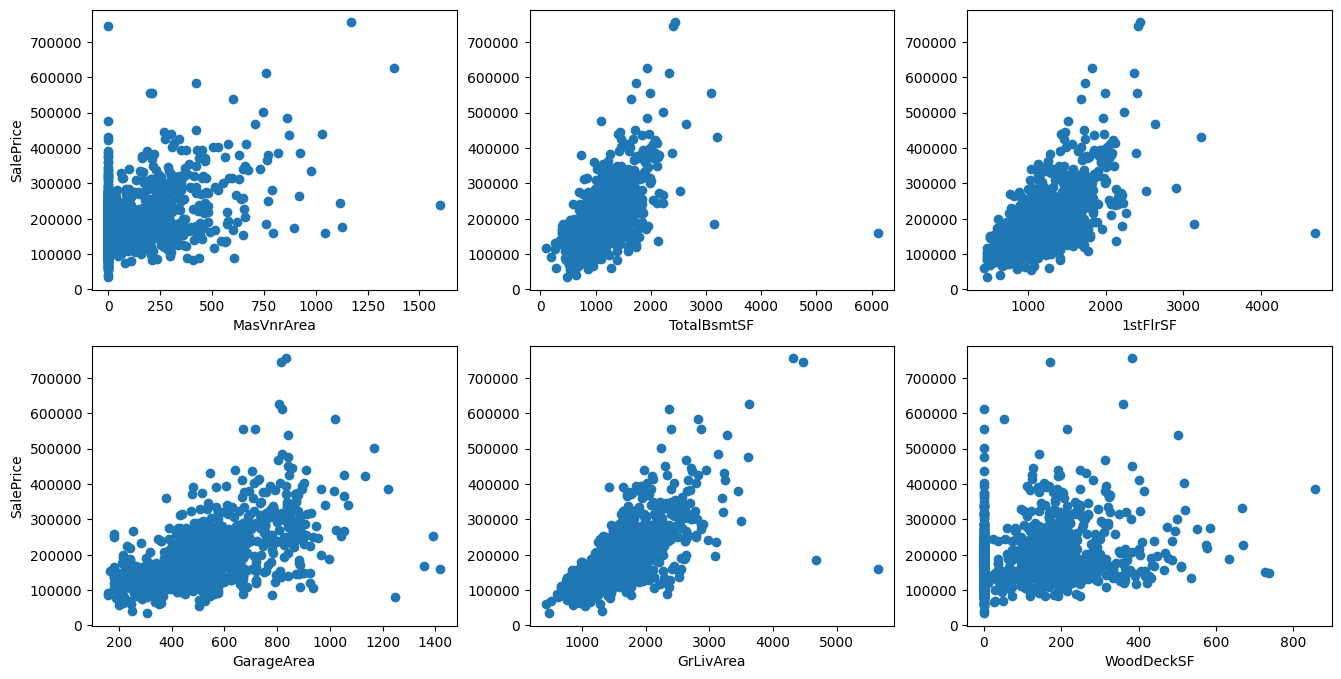

In [124]:
plt.figure(figsize=(16,8))

plt.subplot(2,3,1)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')
plt.scatter(df.MasVnrArea,df.SalePrice)

plt.subplot(2,3,2)
plt.xlabel('TotalBsmtSF')
plt.scatter(df.TotalBsmtSF,df.SalePrice)

plt.subplot(2,3,3)
plt.xlabel('1stFlrSF')
plt.scatter(df['1stFlrSF'],df.SalePrice)

plt.subplot(2,3,4)
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.scatter(df['GarageArea'],df.SalePrice)

plt.subplot(2,3,5)
plt.xlabel('GrLivArea')
plt.scatter(df['GrLivArea'],df.SalePrice)

plt.subplot(2,3,6)
plt.xlabel('WoodDeckSF')
plt.scatter(df['WoodDeckSF'],df.SalePrice)

We can clearly see that few of the numerical variables have some association with the target variable.

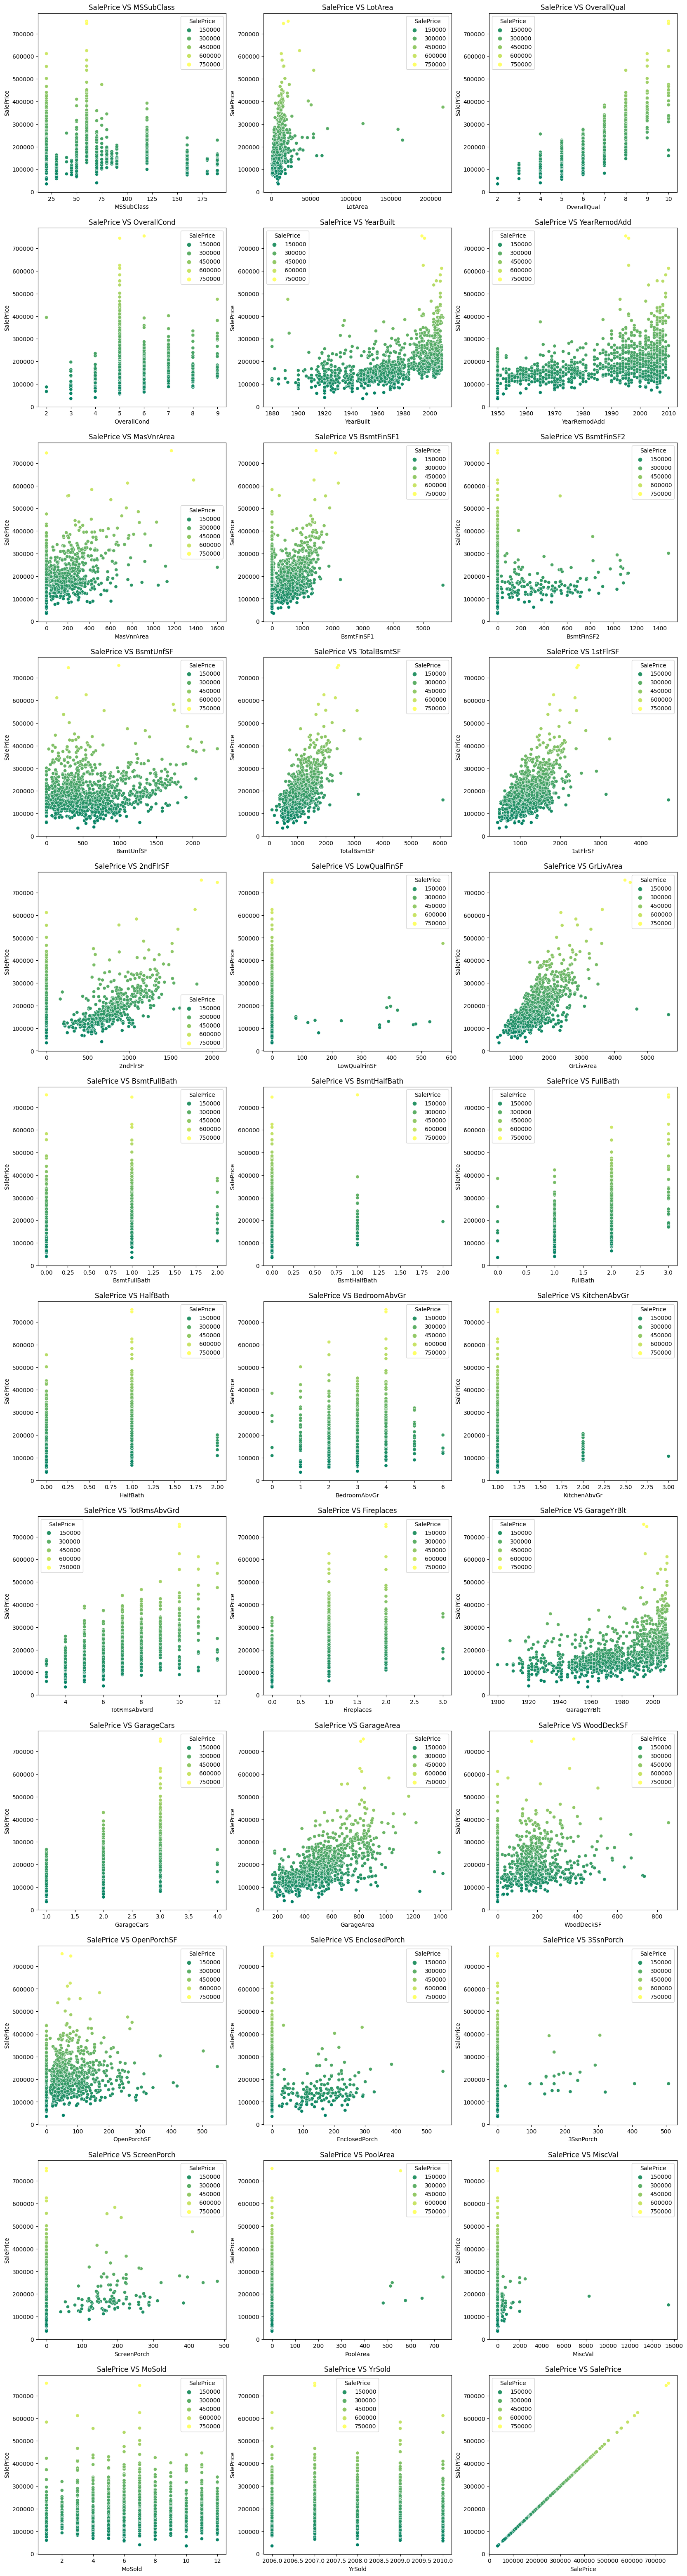

In [17]:
# Visualising all numerical variables with SalePrice

df_num = df.select_dtypes(include=['int64','float64'])
fig,axs= plt.subplots(12,3,figsize=(20,80))

for i,ax in zip(df_num.columns,axs.flatten()):
    sns.scatterplot(x=i, y='SalePrice', hue='SalePrice', data=df_num, ax=ax, palette='summer')
    plt.xlabel(i)
    plt.ylabel('SalePrice')
    ax.set_title('SalePrice'+' VS '+str(i))

- The pairplot above shows that `GarageArea`, `GrLivArea`, `TotalBsmntSF`, etc. show positive correlation with the target variable `SalePrice`.

Let's see the strength of correlation for these columns with `SalePrice`.

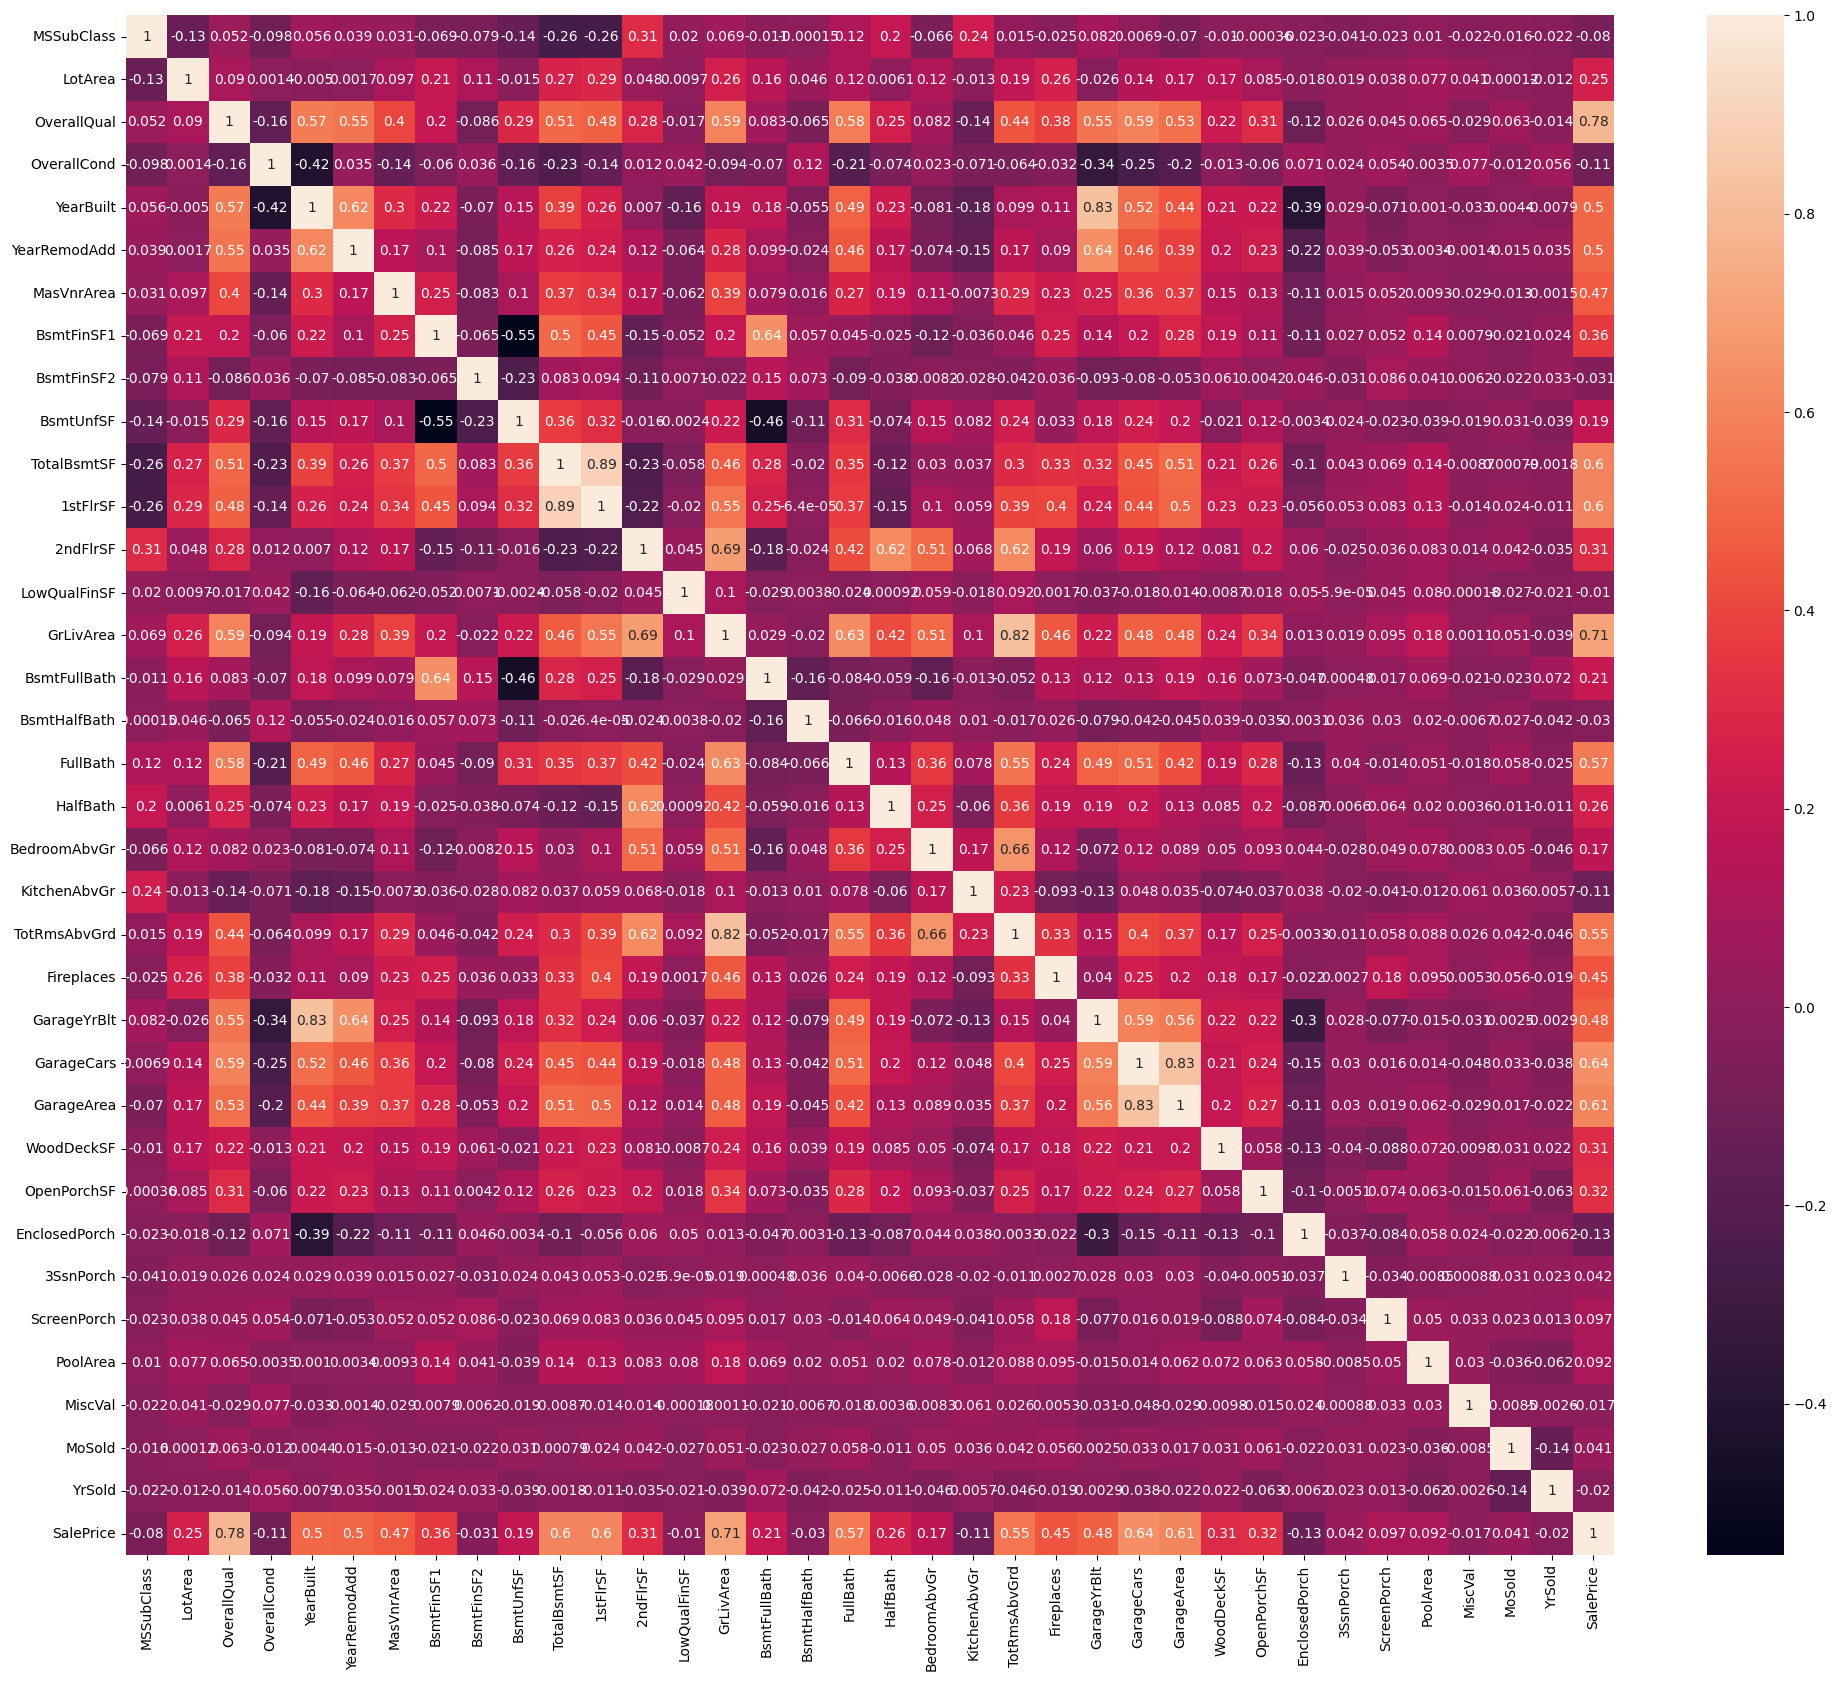

In [125]:
plt.figure(figsize=(24,20))
sns.heatmap(df[list(df.dtypes[df.dtypes!='object'].index)].corr(),annot=True)
plt.show()

It can be clearly seen that `OverallQual`, `GrLivArea` have a strong positive correlation with `SalePrice`, whereas `EnclosedPorch` and `OverallCond` have a negative correlation, which makes sense because if the condition of the house is not good, then it'll lower the price.

In [126]:
for col in df.columns:
    if df[col].value_counts(normalize=True).iloc[0] >= 0.95:
        print(col, end=", ")

Street, Utilities, Condition2, RoofMatl, Heating, CentralAir, LowQualFinSF, KitchenAbvGr, GarageCond, 3SsnPorch, PoolArea, MiscVal, 

`Street, Utilities, Condition2, RoofMatl, Heating, CentralAir, LowQualFinSF, KitchenAbvGr, GarageCond, 3SsnPorch, PoolArea, MiscVal` have 95% majority values, hence, they doesn't add much to the model. 

In [127]:
# dropping above columns
df.drop(['Street', 'Utilities', 'Condition2', 'RoofMatl', 'Heating', 'CentralAir', 'LowQualFinSF', 'KitchenAbvGr', 'GarageCond', '3SsnPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

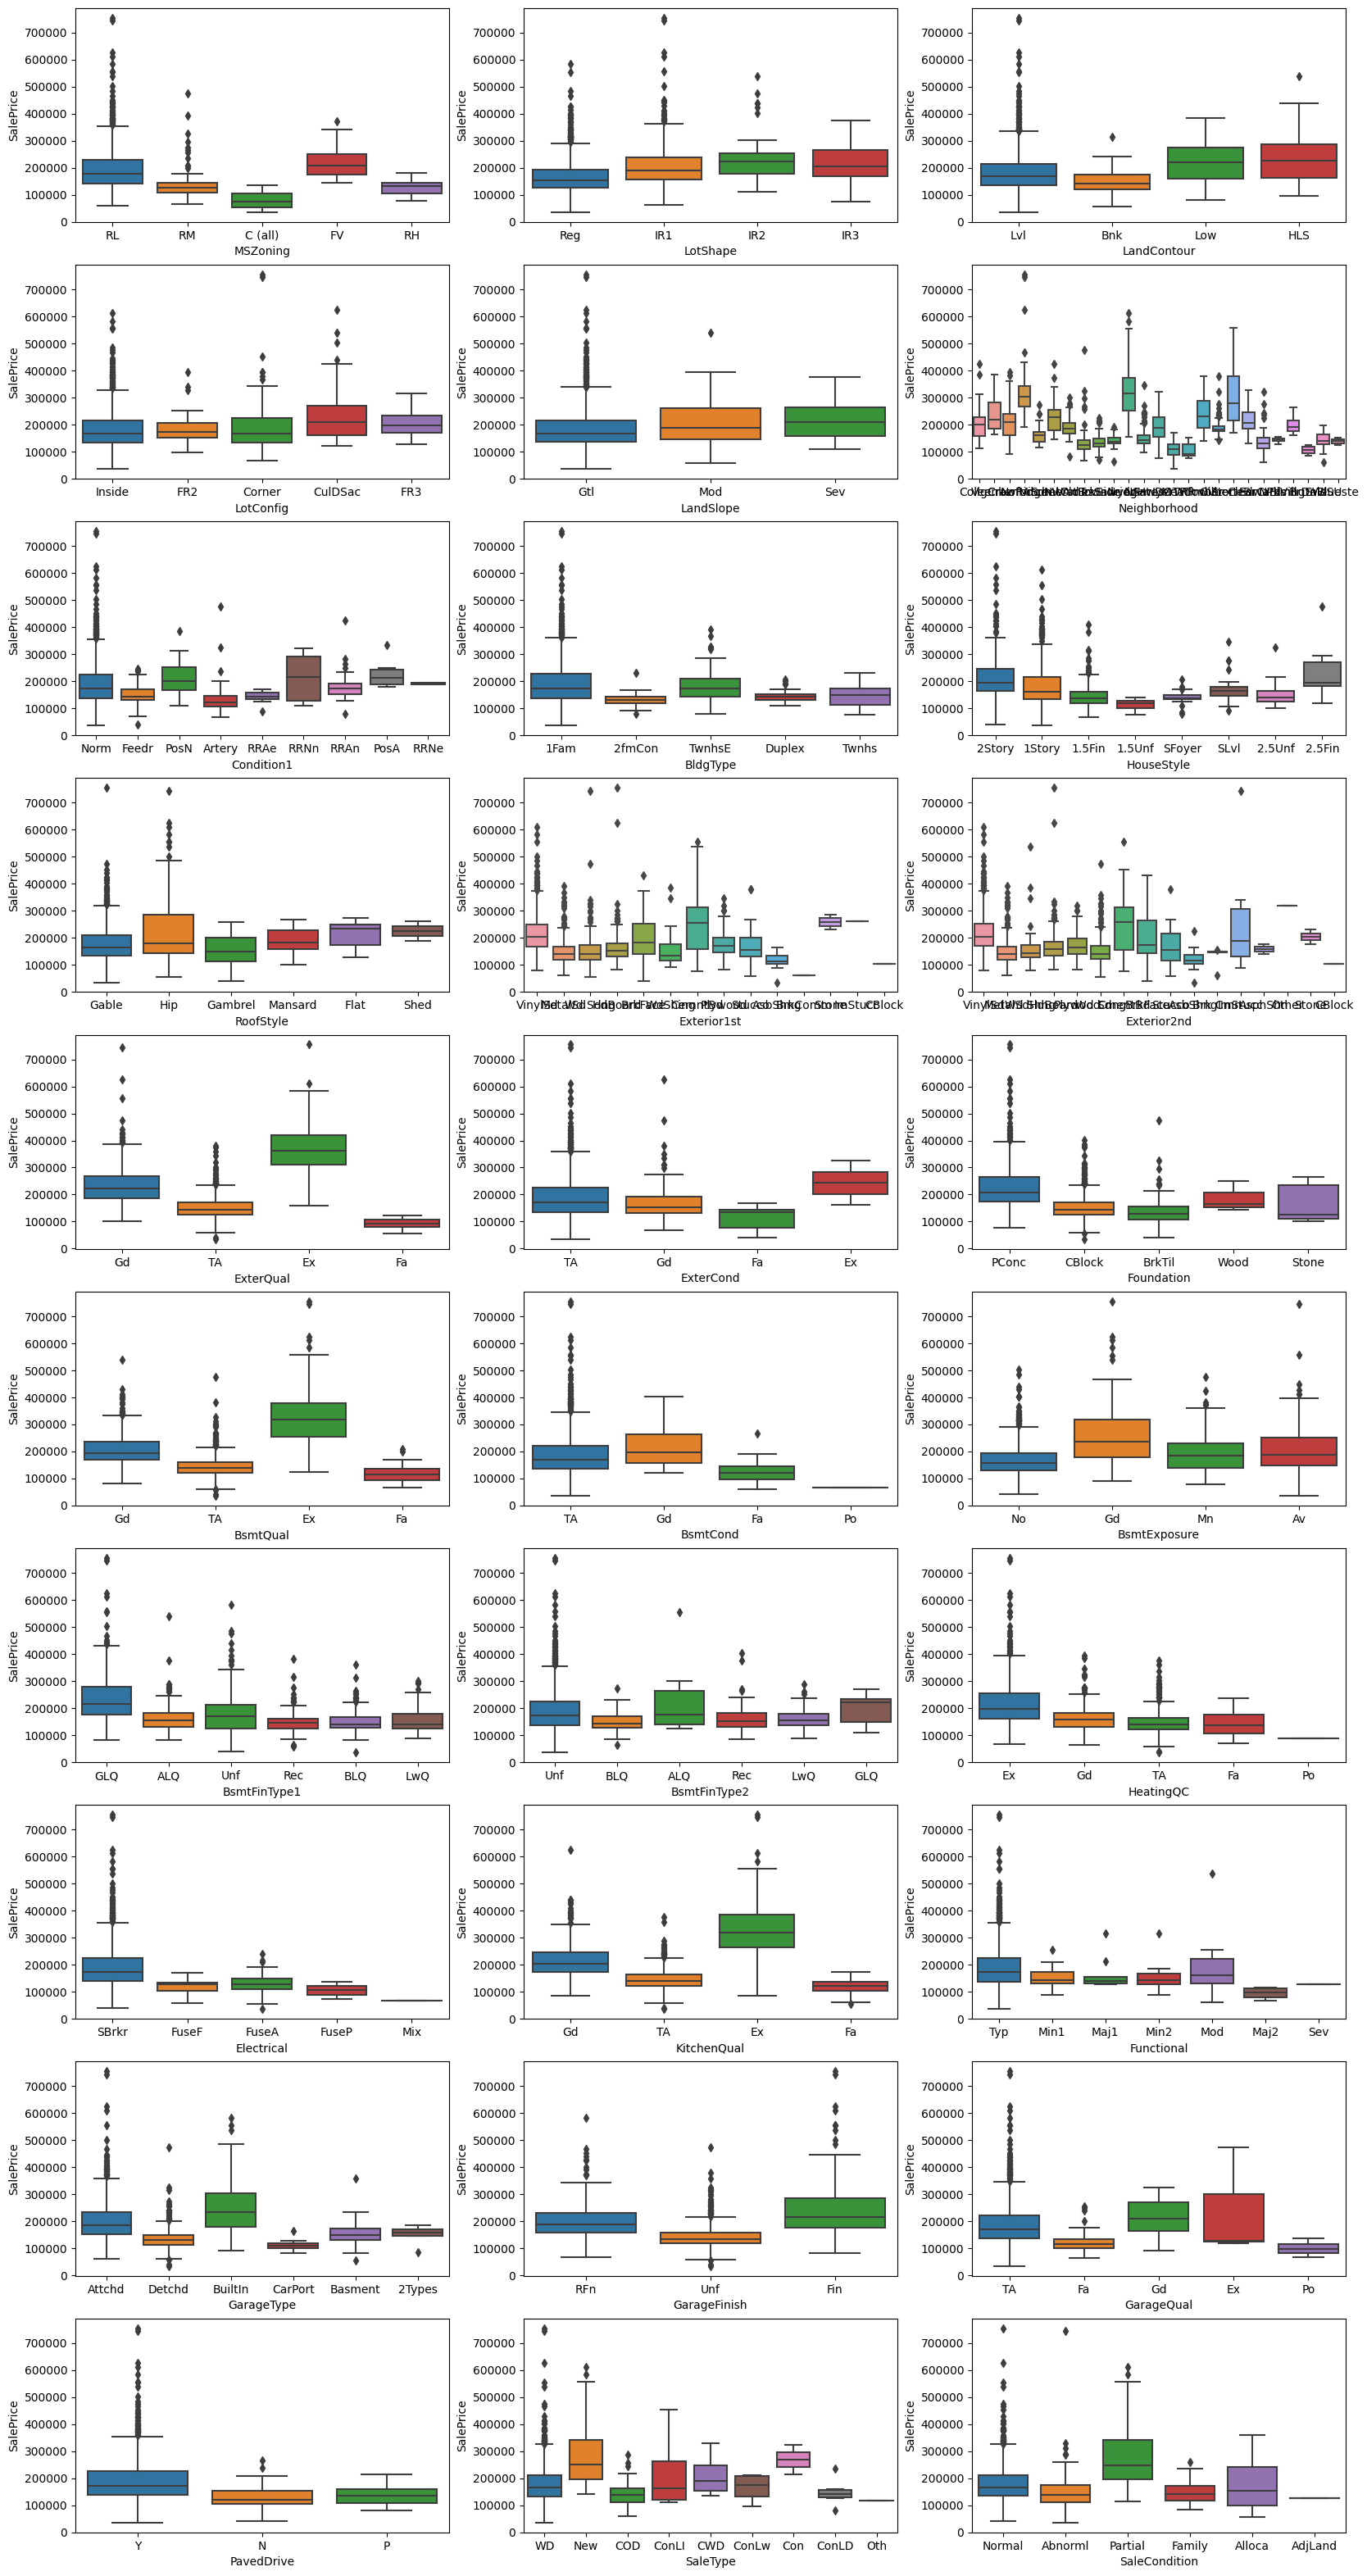

In [128]:
plt.figure(figsize=(20, 40))

for i, col in enumerate(df.select_dtypes(include=['object']).columns):
    plt.subplot(10,3,i+1)
    sns.boxplot(x=col, y='SalePrice', data=df)

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

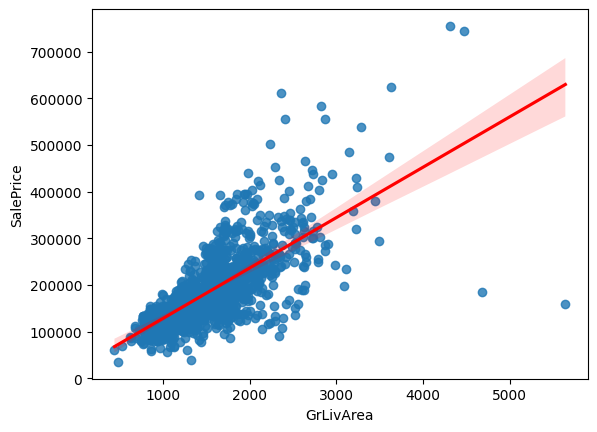

In [129]:
# let's plot a regression plot to get a feel of what the line might look like
sns.regplot(data = df, x='GrLivArea', y='SalePrice', line_kws={'color' : 'r'})

Let's convert the categorical variables using OneHotEncoding

In [130]:
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

MSZoning LotShape LandContour LotConfig LandSlope Neighborhood Condition1 BldgType HouseStyle RoofStyle Exterior1st Exterior2nd ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 HeatingQC Electrical KitchenQual Functional GarageType GarageFinish GarageQual PavedDrive SaleType SaleCondition
0       RL      Reg         Lvl    Inside       Gtl      CollgCr       Norm     1Fam     2Story     Gable     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA           No          GLQ          Unf        Ex      SBrkr          Gd        Typ     Attchd          RFn         TA          Y       WD        Normal
1       RL      Reg         Lvl       FR2       Gtl      Veenker      Feedr     1Fam     1Story     Gable     MetalSd     MetalSd        TA        TA     CBlock       Gd       TA           Gd          ALQ          Unf        Ex      SBrkr          TA        Typ     Attchd          RFn         TA          Y       WD        Normal
2       RL      IR1         Lvl    Inside       Gtl      CollgCr       Norm     1Fam     2Story     Gable     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA           Mn          GLQ          Unf        Ex      SBrkr          Gd        Typ     Attchd          RFn         TA          Y       WD        Normal
3       RL      IR1         Lvl    Corner       Gtl      Crawfor       Norm     1Fam     2Story     Gable     Wd Sdng     Wd Shng        TA        TA     BrkTil       TA       Gd           No          ALQ          Unf        Gd      SBrkr          Gd        Typ     Detchd          Unf         TA          Y       WD       Abnorml
4       RL      IR1         Lvl       FR2       Gtl      NoRidge       Norm     1Fam     2Story     Gable     VinylSd     VinylSd        Gd        TA      PConc       Gd       TA           Av          GLQ          Unf        Ex      SBrkr          Gd        Typ     Attchd          RFn         TA          Y       WD        Normal

In [131]:
dummies = pd.get_dummies(df_categorical, drop_first=True, dtype=int)

In [132]:
dummies.head()

MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  Condition1_Feedr  Condition1_Norm  Condition1_PosA  Condition1_PosN  Condition1_RRAe  Condition1_RRAn  Condition1_RRNe  Condition1_RRNn  BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  HouseStyle_1.5Unf   
0            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                0                0               0                0                  0  \
1            0            0            1            0             0             0             1                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     1                 1                0                0                0                0                0                0                0                0                0               0                0                  0   
2            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0                   0                    0                     0                     0                     0                    0                     0                 0                1                0                0                0                0                0                0                0                0               0                0                  0   
3            0            0            1       

In [133]:
df.drop(df_categorical.columns, axis=1, inplace=True)

In [134]:
df = pd.concat([df, dummies], axis=1)

In [135]:
df.head()

MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  ScreenPorch  MoSold  YrSold  SalePrice  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown   
0          60     8450            7            5       2003          2003     196.000         706           0        150          856       856       854       1710             1             0         2         1             3             8           0     2003.000           2         548           0           61              0            0       2    2008     208500            0            0            1            0             0             0             1                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0  \
1          20     9600            6            8       1976          1976       0.000         978           0        284         1262      1262         0       1262             0             1         2         0             3             6           1     1976.000           2         460         298            0              0            0       5    2007     181500            0            0            1            0             0             0             1                0                0                1                  0              1              0                 0              0              0                     0                    0                     0                     0                     0                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
2          60    11250            7            5       2001          2002     162.000         486           0        434          920       920       866       1786             1             0         2         1             3             6           1     2001.000           2         608           0           42              0            0       9    2008     223500            0            0            1            0             0             0             0                0                0                1                  0              0              0                 1              0              0                     0                    0                     0                     0                     1                     0                     0                     0                    0                     0                     0                   0                     0                    0                     0                     0                     0   
3          70     9550            7            5       1915        

## Model Building

In [136]:
# Preparing Test and Train Set
y = df.pop('SalePrice')
X = df

In [137]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
import math

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [138]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.columns = df.columns

# split 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

Let us build a Multiple Linear Regression model first.

In [139]:
# Instantiate linear regression
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [140]:
print(lm.intercept_)

2066057284698942.5


In [141]:
print(lm.coef_)

[-3.24278024e+04  1.08821687e+05  6.84946943e+04  3.98801910e+04
  1.81026040e+04  3.06101503e+03  1.39735149e+04 -1.11055498e+17
 -2.90035089e+16 -4.59648554e+16  1.18158800e+17 -4.64250845e+04
  1.62134599e+04  3.08086128e+05  1.30888898e+04  9.58795257e+03
  2.21248668e+04  5.07211994e+03 -1.30190398e+04  2.46043015e+04
  1.24668358e+04 -1.49342691e+04  4.13987952e+04 -9.71550197e+03
  2.33975853e+04 -1.24623654e+04  5.47733709e+03  2.54620515e+04
 -6.91626490e+03 -2.53895856e+03  3.90835614e+04  2.83166314e+04
  3.68917219e+04  3.49600000e+04 -2.34200000e+03 -2.60938125e+04
  1.36000000e+03  2.47117500e+04  1.75900000e+04  2.43280000e+04
  9.55200000e+03 -1.21765000e+04 -2.45513281e+04 -1.81600000e+03
  6.95200000e+03 -8.88000000e+02 -1.57862500e+03  5.62700000e+03
  2.83400000e+03 -3.59000000e+03  1.31800000e+03  1.96880000e+04
 -2.27055000e+04 -2.32200000e+03 -2.80800000e+03  2.41750000e+03
 -1.56980000e+04 -1.36280000e+04  6.02700000e+03 -1.26280000e+04
  5.10600000e+04  3.14860

In [142]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric_lr = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_lr)
metric_lr.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_lr)
metric_lr.append(r2_test_lr)

mse_train_lr = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_lr))
metric_lr.append(mse_train_lr)

mse_test_lr = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_lr))
metric_lr.append(mse_train_lr)

R2 Train: 0.8950194302139332
R2 Test: -4.001097911941464e+16
RMSE Train: 26500.133545897632
RMSE Test: 13084770578866.566


### Ridge Regression

In [143]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 100, 1000, 10000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 100, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [144]:
cv_results = pd.DataFrame(model_cv.cv_results_)
# cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.sort_values('mean_test_score', ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
3          0.010         0.001            0.002           0.001       0.100     {'alpha': 0.1}         -23537.361         -20396.203         -20223.472         -20812.567         -22278.342       -21449.589        1269.993                1          -13009.172          -16787.624          -16891.744          -17148.659          -16032.600        -15973.960         1528.247
2          0.014         0.003            0.002           0.000       0.010    {'alpha': 0.01}         -24371.958         -20818.975         -20525.509         -21085.453         -22398.513       -21840.082        1418.624                2          -12918.134          -16795.283          -16880.081          -17165.800          -16059.059        -15963.672         1565.943
1          0.016         0.002            0.003           0.000       0.001   {'alpha': 0.001}         -24634.382         -21127.651         -20563.184         -21084.522         -22400.371       -21962.022        1466.737                3          -12895.566          -16798.304          -16878.577          -17158.833          -16057.496        -15957.755         1573.784
0          0.017         0.003            0.003           0.001       0.000  {'alpha': 0.0001}         -24677.842         -21181.271         -20567.057         -21081.342         -22399.684       -21981.439        1476.241                4          -12894.447          -16801.556          -16878.943          -17158.433          -16057.524        -15958.181         1574.549
4          0.010         0.003            0.003           0.001         100     {'alpha': 100}         -27025.652         -26635.161         -21268.243         -20805.491         -29816.027       -25110.115        3505.151                5          -22948.595          -23850.206          -24382.680          -24246.895          -23220.280        -23729.731          561.788

In [145]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 0.1}
-21449.588813845996


In [146]:
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [147]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric_ridge = []
r2_train_ridge = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_ridge)
metric_ridge.append(r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_ridge)
metric_ridge.append(r2_train_ridge)

mse_train_ridge = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_ridge))
metric_ridge.append(mse_train_ridge)

mse_test_ridge = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_ridge))
metric_ridge.append(mse_test_ridge)

R2 Train: 0.8947934285800229
R2 Test: 0.8135150871959578
RMSE Train: 26528.64288646238
RMSE Test: 28248.69396310864


In [148]:
print(ridge.intercept_)
print(ridge.coef_)

62488.70988274526
[-3.21199297e+04  9.93727071e+04  6.95393794e+04  3.87348204e+04
  1.54852769e+04  3.61158004e+03  1.43942424e+04 -1.88396678e+04
  2.77983228e+03 -9.17333432e+02 -1.73815992e+04  7.24517835e+04
  7.56881090e+04  1.44372944e+05  1.30152464e+04  9.44680289e+03
  2.26784578e+04  5.70885113e+03 -1.22329564e+04  2.68849991e+04
  1.30193313e+04 -1.43057681e+04  4.08441477e+04 -8.40407098e+03
  2.34547882e+04 -1.17635320e+04  5.88760400e+03  2.55595182e+04
 -6.97819307e+03 -2.50890410e+03  3.39413215e+04  2.29472711e+04
  3.20548185e+04  3.07860590e+04 -1.38456630e+03 -2.51435509e+04
  1.16505187e+03  2.43441807e+04  1.70332428e+04  2.40584737e+04
  9.45491318e+03 -1.23549206e+04 -2.43199822e+04 -1.90265832e+03
  7.52393726e+03  2.31036473e+03 -2.57113863e+03  3.70440252e+03
  1.53313959e+03 -4.34243800e+03  3.45449604e+02  1.84004350e+04
 -2.33762116e+04 -3.22804180e+03 -4.78220380e+03  1.30407077e+03
 -1.65344545e+04 -1.42082772e+04  6.04811456e+03 -1.31670313e+04
  5.035

### Lasso Regression

In [149]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 100, 1000, 10000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.sort_values('mean_test_score', ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha             params  split0_test_score  split1_test_score  split2_test_score  split3_test_score  split4_test_score  mean_test_score  std_test_score  rank_test_score  split0_train_score  split1_train_score  split2_train_score  split3_train_score  split4_train_score  mean_train_score  std_train_score
4          0.008         0.001            0.002           0.000         100     {'alpha': 100}         -21501.416         -17291.374         -18339.128         -17755.518         -20765.343       -19130.556        1684.825                1          -14471.432          -16872.575          -17128.948          -17072.292          -16088.134        -16326.676          999.642
3          0.073         0.019            0.003           0.001       0.100     {'alpha': 0.1}         -24661.543         -20844.352         -20556.164         -21090.589         -22440.011       -21918.532        1516.011                2          -12898.586          -16807.480          -16877.600          -17162.234          -16058.056        -15960.791         1574.004
0          0.066         0.006            0.004           0.001       0.000  {'alpha': 0.0001}         -24688.683         -20872.793         -20568.619         -21254.991         -22449.235       -21966.864        1503.318                3          -12897.389          -16809.312          -16878.245          -17163.251          -16058.595        -15961.358         1574.904
1          0.062         0.007            0.003           0.000       0.001   {'alpha': 0.001}         -24688.394         -20872.546         -20568.522         -21256.695         -22449.167       -21967.065        1503.102                4          -12897.389          -16809.287          -16878.230          -17163.237          -16058.586        -15961.346         1574.897
2          0.056         0.007            0.003           0.000       0.010    {'alpha': 0.01}         -24685.720         -20870.079         -20567.543         -21273.738         -22448.332       -21969.083        1501.028                5          -12897.430          -16809.070          -16878.172          -17163.144          -16058.543        -15961.272         1574.837

In [151]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 100}
-19130.555851167104


In [152]:
alpha = 100
lasso = Lasso(alpha=alpha)
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [153]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_lasso)
metric_lasso.append(r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_lasso)
metric_lasso.append(r2_test_lasso)

mse_train_lasso = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_lasso))
metric_lasso.append(mse_train_lasso)

mse_test_lasso = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_lasso))
metric_lasso.append(mse_test_lasso)

R2 Train: 0.8830409020785015
R2 Test: 0.8417946720032207
RMSE Train: 27971.168196366292
RMSE Test: 26018.788776441794


In [154]:
print(lasso.intercept_)
print(lasso.coef_)

60499.2631808555
[-2.89601884e+04  3.28358467e+04  8.46338565e+04  3.17298964e+04
  0.00000000e+00  6.83836562e+03  1.69545773e+04  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  2.86643691e+04  1.94100248e+05  9.42593258e+03  0.00000000e+00
  1.19325269e+04  2.85069926e+03 -0.00000000e+00  2.65235933e+04
  1.71223617e+04 -0.00000000e+00  3.58836762e+04  0.00000000e+00
  1.91522620e+04 -0.00000000e+00 -0.00000000e+00  2.04964358e+04
 -4.49766019e+03 -0.00000000e+00  2.40965726e+01 -0.00000000e+00
  5.08128638e+03 -0.00000000e+00  3.82902475e+03 -7.43457597e+03
 -0.00000000e+00  1.15966791e+04  8.36619503e+03  1.54646729e+04
  9.93841540e+03 -6.51478275e+03 -0.00000000e+00 -1.96322927e+02
  7.18161415e+03  1.29863790e+03 -0.00000000e+00  0.00000000e+00
  1.07329944e+03  0.00000000e+00  0.00000000e+00  1.70236052e+04
 -1.71224858e+04 -0.00000000e+00 -1.58458698e+03 -0.00000000e+00
 -8.19621411e+03 -8.49477636e+03  0.00000000e+00 -5.58471865e+03
  5.0790

In [158]:
metric_df = pd.concat([pd.Series(metric_lr), pd.Series(metric_lasso), pd.Series(metric_ridge)], axis=1)
metric_df.columns = ['LinearRegression', 'Lasso', 'Ridge']
metric_df['Metric'] = ['R2 Train', 'R2 Test', 'RMSE Train', 'RMSE Test']

metric_df = metric_df[['Metric', 'LinearRegression', 'Lasso', 'Ridge']]

In [159]:
metric_df

Metric       LinearRegression     Lasso     Ridge
0    R2 Train                  0.895     0.883     0.895
1     R2 Test -40010979119414640.000     0.842     0.895
2  RMSE Train              26500.134 27971.168 26528.643
3   RMSE Test              26500.134 26018.789 28248.694

In [160]:
y_train_pred = ridge.predict(X_train)

Text(0.5, 0, 'Errors')

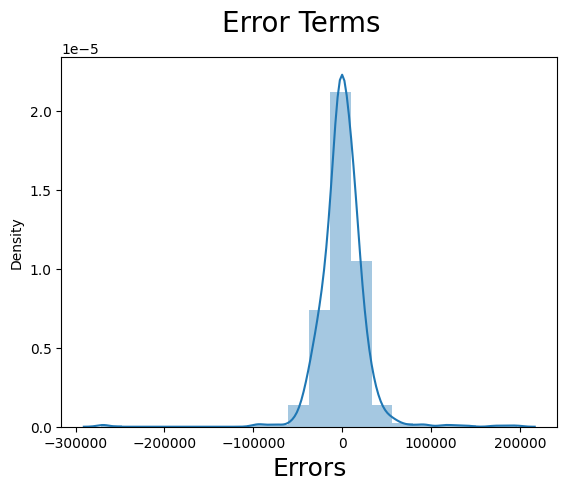

In [161]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [162]:
y_train_pred = lasso.predict(X_train)

Text(0.5, 0, 'Errors')

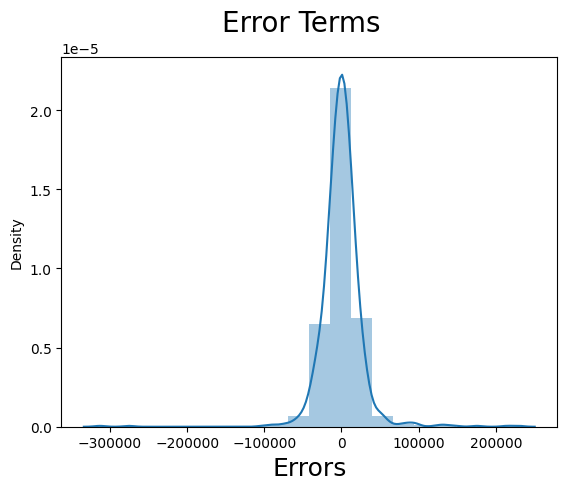

In [163]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [164]:
# lasso model parameters
# taking top 30 parameters based on lasso
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = []
for k, v in sorted(list(zip(model_parameters, cols)), key = lambda x: abs(x[0]), reverse = True)[1:16]:
    lasso_features.append(v)

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(194100.248, 'GrLivArea'),
 (84633.856, 'OverallQual'),
 (60499.263, 'constant'),
 (50790.41, 'Neighborhood_NoRidge'),
 (42681.419, 'Neighborhood_StoneBr'),
 (35883.676, 'GarageCars'),
 (32835.847, 'LotArea'),
 (31729.896, 'OverallCond'),
 (-30619.512, 'BsmtQual_TA'),
 (-29430.178, 'BsmtQual_Gd'),
 (-28960.188, 'MSSubClass'),
 (28664.369, '2ndFlrSF'),
 (27303.627, 'Neighborhood_NridgHt'),
 (-26892.644, 'KitchenQual_TA'),
 (26523.593, 'TotRmsAbvGrd'),
 (-25427.111, 'BsmtQual_Fa'),
 (-24991.583, 'KitchenQual_Gd'),
 (21416.651, 'BsmtExposure_Gd'),
 (20496.436, 'ScreenPorch'),
 (20148.764, 'Exterior1st_BrkFace'),
 (19152.262, 'WoodDeckSF'),
 (-19144.189, 'Exterior2nd_Stucco'),
 (18823.655, 'Neighborhood_Somerst'),
 (-17122.486, 'Neighborhood_Edwards'),
 (17122.362, 'Fireplaces'),
 (17023.605, 'Neighborhood_Crawfor'),
 (16954.577, 'MasVnrArea'),
 (15464.673, 'LandContour_Lvl'),
 (-13845.869, 'KitchenQual_Fa'),
 (-12926.113, 'BldgType_Duplex'),
 (12638.644, 'SaleCondition_Partial'),
 (11932

In [212]:
# lasso model parameters
# taking top 30 parameters based on lasso
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = []
for k, v in sorted(list(zip(model_parameters, cols)), key = lambda x: abs(x[0]), reverse = True)[1:16]:
    lasso_features.append(v)

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(144372.944, 'GrLivArea'),
 (99372.707, 'LotArea'),
 (75688.109, '2ndFlrSF'),
 (72451.784, '1stFlrSF'),
 (69539.379, 'OverallQual'),
 (62488.71, 'constant'),
 (-60357.438, 'GarageQual_Po'),
 (-60055.074, 'GarageQual_Fa'),
 (50351.751, 'Neighborhood_NoRidge'),
 (48356.368, 'Neighborhood_StoneBr'),
 (-47055.238, 'GarageQual_TA'),
 (40844.148, 'GarageCars'),
 (-39531.877, 'Exterior1st_ImStucc'),
 (-39385.565, 'Functional_Sev'),
 (38734.82, 'OverallCond'),
 (35402.914, 'Exterior2nd_ImStucc'),
 (33941.321, 'MSZoning_FV'),
 (-32119.93, 'MSSubClass'),
 (32054.818, 'MSZoning_RL'),
 (-31691.602, 'BsmtQual_Fa'),
 (-31542.74, 'BsmtQual_Gd'),
 (-31278.466, 'BsmtQual_TA'),
 (30786.059, 'MSZoning_RM'),
 (-30387.385, 'GarageQual_Gd'),
 (30349.122, 'Neighborhood_NridgHt'),
 (-28660.105, 'KitchenQual_TA'),
 (27901.625, 'SaleType_Oth'),
 (-27671.057, 'KitchenQual_Gd'),
 (-27328.844, 'Electrical_FuseP'),
 (26884.999, 'TotRmsAbvGrd'),
 (-25770.051, 'Exterior2nd_Stucco'),
 (25559.518, 'ScreenPorch'),
 (-2

### Automated Feature Selection (RFE)

In [165]:
from sklearn.feature_selection import RFE

In [166]:
# using Linear Regression model for top 30 features

rfe = RFE(lm, n_features_to_select=30)
rfe = rfe.fit(X_train, y_train)

In [167]:
# Listing out the top 30 columns that are selected in RFE (Automated selection of Predictors)
rfe_features = X_train.columns[rfe.support_]
rfe_features

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'GarageCars', 'ScreenPorch', 'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_StoneBr', 'Exterior1st_ImStucc', 'Exterior2nd_Stone', 'Exterior2nd_Stucco', 'ExterCond_Gd', 'ExterCond_TA', 'BsmtQual_Fa', 'BsmtQual_Gd', 'BsmtQual_TA', 'KitchenQual_Fa', 'KitchenQual_Gd', 'KitchenQual_TA', 'Functional_Sev', 'GarageQual_Po', 'SaleType_CWD'], dtype='object')

In [168]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [169]:
X_train_rfe = X_train[rfe_features]

In [170]:
X_train_rfe.shape

(1070, 30)

In [172]:
y_train = y_train.values.reshape(-1,1)

In [173]:
X_train_lm = sm.add_constant(X_train_rfe)

lr = sm.OLS(y_train, X_train_lm).fit()

In [174]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     201.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:26:16   Log-Likelihood:                -12596.
No. Observations:                1070   AIC:                         2.525e+04
Df Residuals:                    1039   BIC:                         2.541e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 9.201e+04    1.6e+04      5.738      0.000    6.05e+04    1.23e+05
MSSubClass           -3.529e+04   4274.100     -8.256      0.000   -4.37e+04   -2.69e+04
LotArea                1.74e+05    2.3e+04      7.562      0.000    1.29e+05    2.19e+05
OverallQual           9.509e+04   1.07e+04      8.898      0.000    7.41e+04    1.16e+05
OverallCond           4.867e+04   7722.828      6.302      0.000    3.35e+04    6.38e+04
YearBuilt             5.669e+04   8066.106      7.028      0.000    4.09e+04    7.25e+04
BsmtFinSF1            5.012e+04   1.37e+04      3.670      0.000    2.33e+04    7.69e+04
GrLivArea             2.638e+05   2.17e+04     12.162      0.000    2.21e+05    3.06e+05
BedroomAbvGr         -3.504e+04   1.14e+04     -3.070      0.002   -5.74e+04   -1.26e+04
TotRmsAbvGrd          2.157e+04   1.19e+04      1.818      0.069   -1707.409    4.48e+04
GarageCars            3.918e+04   6426.309      6.097      0.000    2.66e+04    5.18e+04
ScreenPorch           3.265e+04   8287.841      3.940      0.000    1.64e+04    4.89e+04
LotShape_IR3         -4.681e+04   1.14e+04     -4.097      0.000   -6.92e+04   -2.44e+04
Neighborhood_Crawfor  3.296e+04   5989.059      5.504      0.000    2.12e+04    4.47e+04
Neighborhood_NoRidge  6.016e+04   6499.367      9.257      0.000    4.74e+04    7.29e+04
Neighborhood_NridgHt  2.797e+04   4997.411      5.596      0.000    1.82e+04    3.78e+04
Neighborhood_StoneBr   4.76e+04   7317.849      6.504      0.000    3.32e+04     6.2e+04
Exterior1st_ImStucc  -4.314e+04   3.25e+04     -1.326      0.185   -1.07e+05    2.07e+04
Exterior2nd_Stone    -3.687e+04   3.29e+04     -1.122      0.262   -1.01e+05    2.76e+04
Exterior2nd_Stucco   -3.152e+04   8540.754     -3.690      0.000   -4.83e+04   -1.48e+04
ExterCond_Gd         -2.532e+04   1.11e+04     -2.290      0.022    -4.7e+04   -3620.362
ExterCond_TA         -2.547e+04   1.06e+04     -2.399      0.017   -4.63e+04   -4632.972
BsmtQual_Fa          -4.391e+04   9193.346     -4.777      0.000    -6.2e+04   -2.59e+04
BsmtQual_Gd          -3.652e+04   4615.409     -7.913      0.000   -4.56e+04   -2.75e+04
BsmtQual_TA           -3.93e+04   5682.255     -6.916      0.000   -5.04e+04   -2.81e+04
KitchenQual_Fa       -3.319e+04      1e+04     -3.318      0.001   -5.28e+04   -1.36e+04
KitchenQual_Gd       -2.829e+04   4859.314     -5.821      0.000   -3.78e+04   -1.88e+04
KitchenQual_TA       -3.427e+04   5447.833     -6.291      0.000    -4.5e+04   -2.36e+04
Functional_Sev       -8.323e+04   3.22e+04     -2.581      0.010   -1.47e+05   -1.99e+04
GarageQual_Po        -2.305e+04   2.04e+04     -1.130      0.259   -6.31e+04     1.7e+04
SaleType_CWD          3.245e+04   1.87e+04      1.738      0.082   -4176.343    6.91e+04
=========================================================

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [175]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
20          ExterCond_TA 63.050
4              YearBuilt 34.060
2            OverallQual 33.710
7           BedroomAbvGr 33.160
8           TotRmsAbvGrd 27.900
6              GrLivArea 27.810
3            OverallCond 16.570
26        KitchenQual_TA 13.250
23           BsmtQual_TA 13.110
25        KitchenQual_Gd  9.570
22           BsmtQual_Gd  9.440
19          ExterCond_Gd  8.620
9             GarageCars  5.760
5             BsmtFinSF1  2.700
1                LotArea  2.380
0             MSSubClass  1.990
21           BsmtQual_Fa  1.800
14  Neighborhood_NridgHt  1.660
24        KitchenQual_Fa  1.400
13  Neighborhood_NoRidge  1.280
12  Neighborhood_Crawfor  1.200
28         GarageQual_Po  1.170
15  Neighborhood_StoneBr  1.160
11          LotShape_IR3  1.160
18    Exterior2nd_Stucco  1.140
10           ScreenPorch  1.130
17     Exterior2nd_Stone  1.070
16   Exterior1st_ImStucc  1.050
27        Functional_Sev  1.030
29          SaleType_CWD  1.030

In [177]:
X_test_rfe = X_test[rfe_features]

lm=LinearRegression()

lm.fit(X_train_rfe, y_train)

y_pred_train = lm.predict(X_train_rfe)
y_pred_test = lm.predict(X_test_rfe)

### Let's use Lasso Selected features

In [182]:
# Dropping highly correlated variables and insignificant variables

X_train_lasso = X_train[lasso_features]

In [183]:
X_train_lm = sm.add_constant(X_train_lasso)

lr = sm.OLS(y_train, X_train_lm).fit()

In [184]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     307.0
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:30:59   Log-Likelihood:                -12753.
No. Observations:                1070   AIC:                         2.554e+04
Df Residuals:                    1055   BIC:                         2.561e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.641e+04   9815.211      8.803      0.000    6.71e+04    1.06e+05
OverallQual           1.604e+05   1.11e+04     14.391      0.000    1.39e+05    1.82e+05
Neighborhood_NoRidge  7.815e+04   7086.950     11.027      0.000    6.42e+04    9.21e+04
Neighborhood_StoneBr  5.788e+04   8328.998      6.949      0.000    4.15e+04    7.42e+04
GarageCars             5.08e+04   7218.056      7.038      0.000    3.66e+04     6.5e+04
LotArea               2.106e+05   2.44e+04      8.646      0.000    1.63e+05    2.58e+05
OverallCond           4.144e+04   7976.854      5.195      0.000    2.58e+04    5.71e+04
BsmtQual_TA          -7.018e+04   5883.616    -11.929      0.000   -8.17e+04   -5.86e+04
BsmtQual_Gd          -5.654e+04   4921.972    -11.487      0.000   -6.62e+04   -4.69e+04
MSSubClass           -3.249e+04   5213.473     -6.231      0.000   -4.27e+04   -2.23e+04
2ndFlrSF               1.41e+04   7493.229      1.882      0.060    -603.004    2.88e+04
Neighborhood_NridgHt  3.063e+04   5618.523      5.451      0.000    1.96e+04    4.17e+04
KitchenQual_TA       -1.017e+04   2889.991     -3.517      0.000   -1.58e+04   -4494.281
TotRmsAbvGrd          8.528e+04   9470.918      9.004      0.000    6.67e+04    1.04e+05
BsmtQual_Fa          -8.455e+04   9611.823     -8.797      0.000   -1.03e+05   -6.57e+04
==============================================================================
Omnibus:                      326.930   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7281.459
Skew:                           0.858   Prob(JB):                         0.00
Kurtosis:                      15.664   Cond. No.                         34.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [185]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            OverallQual 18.160
12          TotRmsAbvGrd 13.150
5            OverallCond 12.730
6            BsmtQual_TA  7.560
3             GarageCars  5.380
7            BsmtQual_Gd  5.360
9               2ndFlrSF  3.330
11        KitchenQual_TA  2.870
8             MSSubClass  2.210
4                LotArea  2.010
10  Neighborhood_NridgHt  1.590
13           BsmtQual_Fa  1.370
1   Neighborhood_NoRidge  1.160
2   Neighborhood_StoneBr  1.140

In [186]:
# Dropping highly correlated variables and insignificant variables

X_train_lasso = X_train_lasso.drop(['2ndFlrSF'], axis=1)

In [187]:
X_train_lm = sm.add_constant(X_train_lasso)

lr = sm.OLS(y_train, X_train_lm).fit()

In [188]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     329.5
Date:                Wed, 22 Nov 2023   Prob (F-statistic):               0.00
Time:                        16:31:22   Log-Likelihood:                -12755.
No. Observations:                1070   AIC:                         2.554e+04
Df Residuals:                    1056   BIC:                         2.561e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 8.271e+04   9627.806      8.590      0.000    6.38e+04    1.02e+05
OverallQual           1.617e+05   1.11e+04     14.516      0.000     1.4e+05    1.84e+05
Neighborhood_NoRidge   8.01e+04   7019.567     11.410      0.000    6.63e+04    9.39e+04
Neighborhood_StoneBr  5.653e+04   8307.920      6.804      0.000    4.02e+04    7.28e+04
GarageCars            4.969e+04   7202.586      6.899      0.000    3.56e+04    6.38e+04
LotArea                 2.1e+05   2.44e+04      8.610      0.000    1.62e+05    2.58e+05
OverallCond           4.272e+04   7957.505      5.368      0.000    2.71e+04    5.83e+04
BsmtQual_TA          -6.987e+04   5888.393    -11.866      0.000   -8.14e+04   -5.83e+04
BsmtQual_Gd          -5.601e+04   4919.997    -11.385      0.000   -6.57e+04   -4.64e+04
MSSubClass           -2.862e+04   4797.207     -5.966      0.000    -3.8e+04   -1.92e+04
Neighborhood_NridgHt  2.915e+04   5570.207      5.234      0.000    1.82e+04    4.01e+04
KitchenQual_TA       -1.043e+04   2890.004     -3.609      0.000   -1.61e+04   -4760.194
TotRmsAbvGrd          9.587e+04   7627.731     12.568      0.000    8.09e+04    1.11e+05
BsmtQual_Fa          -8.383e+04   9615.694     -8.718      0.000   -1.03e+05    -6.5e+04
==============================================================================
Omnibus:                      334.955   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7653.295
Skew:                           0.885   Prob(JB):                         0.00
Kurtosis:                      15.982   Cond. No.                         34.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [189]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0            OverallQual 18.020
5            OverallCond 12.720
11          TotRmsAbvGrd  8.700
6            BsmtQual_TA  7.440
7            BsmtQual_Gd  5.320
3             GarageCars  5.310
10        KitchenQual_TA  2.820
4                LotArea  2.010
8             MSSubClass  1.900
9   Neighborhood_NridgHt  1.550
12           BsmtQual_Fa  1.370
1   Neighborhood_NoRidge  1.130
2   Neighborhood_StoneBr  1.130

In [190]:
# Dropping highly correlated variables and insignificant variables

X_train_lasso = X_train_lasso.drop(['OverallQual'], axis=1)

In [191]:
X_train_lm = sm.add_constant(X_train_lasso)

lr = sm.OLS(y_train, X_train_lm).fit()

In [192]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          5.41e-320
Time:                        16:31:36   Log-Likelihood:                -12852.
No. Observations:                1070   AIC:                         2.573e+04
Df Residuals:                    1057   BIC:                         2.580e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.722e+05   8093.075     21.282      0.000    1.56e+05    1.88e+05
Neighborhood_NoRidge  9.153e+04   7635.883     11.987      0.000    7.65e+04    1.07e+05
Neighborhood_StoneBr  7.406e+04   8998.203      8.231      0.000    5.64e+04    9.17e+04
GarageCars            6.831e+04   7758.678      8.805      0.000    5.31e+04    8.35e+04
LotArea               2.123e+05   2.67e+04      7.952      0.000     1.6e+05    2.65e+05
OverallCond           5.038e+04   8691.992      5.796      0.000    3.33e+04    6.74e+04
BsmtQual_TA          -9.988e+04   6035.968    -16.547      0.000   -1.12e+05    -8.8e+04
BsmtQual_Gd          -7.242e+04   5241.909    -13.816      0.000   -8.27e+04   -6.21e+04
MSSubClass           -2.794e+04   5251.326     -5.321      0.000   -3.82e+04   -1.76e+04
Neighborhood_NridgHt  4.141e+04   6027.266      6.871      0.000    2.96e+04    5.32e+04
KitchenQual_TA       -2.324e+04   3012.653     -7.714      0.000   -2.92e+04   -1.73e+04
TotRmsAbvGrd           1.28e+05   7990.770     16.019      0.000    1.12e+05    1.44e+05
BsmtQual_Fa          -1.258e+05      1e+04    -12.531      0.000   -1.46e+05   -1.06e+05
==============================================================================
Omnibus:                      325.011   Durbin-Watson:                   2.054
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4231.443
Skew:                           1.016   Prob(JB):                         0.00
Kurtosis:                      12.528   Cond. No.                         32.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [193]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4            OverallCond 10.570
5            BsmtQual_TA  7.390
10          TotRmsAbvGrd  7.210
6            BsmtQual_Gd  4.940
2             GarageCars  4.550
9         KitchenQual_TA  2.800
3                LotArea  2.010
7             MSSubClass  1.890
8   Neighborhood_NridgHt  1.400
11           BsmtQual_Fa  1.370
0   Neighborhood_NoRidge  1.120
1   Neighborhood_StoneBr  1.080

In [194]:
# Dropping highly correlated variables and insignificant variables

X_train_lasso = X_train_lasso.drop(['OverallCond'], axis=1)

In [195]:
X_train_lm = sm.add_constant(X_train_lasso)

lr = sm.OLS(y_train, X_train_lm).fit()

In [196]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     296.8
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.45e-314
Time:                        16:31:50   Log-Likelihood:                -12869.
No. Observations:                1070   AIC:                         2.576e+04
Df Residuals:                    1058   BIC:                         2.582e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.967e+05   7011.796     28.052      0.000    1.83e+05     2.1e+05
Neighborhood_NoRidge  9.073e+04   7751.344     11.704      0.000    7.55e+04    1.06e+05
Neighborhood_StoneBr  7.172e+04   9126.542      7.858      0.000    5.38e+04    8.96e+04
GarageCars            6.396e+04   7840.320      8.158      0.000    4.86e+04    7.93e+04
LotArea               2.165e+05   2.71e+04      7.991      0.000    1.63e+05     2.7e+05
BsmtQual_TA          -9.319e+04   6015.192    -15.492      0.000   -1.05e+05   -8.14e+04
BsmtQual_Gd          -7.068e+04   5313.342    -13.303      0.000   -8.11e+04   -6.03e+04
MSSubClass           -2.924e+04   5326.776     -5.489      0.000   -3.97e+04   -1.88e+04
Neighborhood_NridgHt  3.989e+04   6113.577      6.525      0.000    2.79e+04    5.19e+04
KitchenQual_TA       -2.597e+04   3021.015     -8.597      0.000   -3.19e+04      -2e+04
TotRmsAbvGrd          1.291e+05   8110.571     15.920      0.000    1.13e+05    1.45e+05
BsmtQual_Fa          -1.172e+05   1.01e+04    -11.626      0.000   -1.37e+05   -9.74e+04
==============================================================================
Omnibus:                      334.506   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4251.941
Skew:                           1.064   Prob(JB):                         0.00
Kurtosis:                      12.531   Cond. No.                         30.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [197]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
9           TotRmsAbvGrd 6.840
2             GarageCars 4.480
4            BsmtQual_TA 3.970
5            BsmtQual_Gd 3.310
8         KitchenQual_TA 2.800
3                LotArea 1.990
6             MSSubClass 1.890
7   Neighborhood_NridgHt 1.370
10           BsmtQual_Fa 1.170
0   Neighborhood_NoRidge 1.120
1   Neighborhood_StoneBr 1.080

In [198]:
# Dropping highly correlated variables and insignificant variables

X_train_lasso = X_train_lasso.drop(['TotRmsAbvGrd'], axis=1)

In [199]:
X_train_lm = sm.add_constant(X_train_lasso)

lr = sm.OLS(y_train, X_train_lm).fit()

In [200]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     243.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.20e-266
Time:                        16:31:59   Log-Likelihood:                -12984.
No. Observations:                1070   AIC:                         2.599e+04
Df Residuals:                    1059   BIC:                         2.604e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.389e+05   7224.816     33.061      0.000    2.25e+05    2.53e+05
Neighborhood_NoRidge  1.053e+05   8565.578     12.293      0.000    8.85e+04    1.22e+05
Neighborhood_StoneBr  7.052e+04   1.02e+04      6.943      0.000    5.06e+04    9.04e+04
GarageCars            1.022e+05   8306.394     12.298      0.000    8.59e+04    1.18e+05
LotArea               2.852e+05   2.98e+04      9.581      0.000    2.27e+05    3.44e+05
BsmtQual_TA          -9.675e+04   6689.231    -14.463      0.000    -1.1e+05   -8.36e+04
BsmtQual_Gd          -7.908e+04   5883.633    -13.440      0.000   -9.06e+04   -6.75e+04
MSSubClass           -2.301e+04   5911.749     -3.892      0.000   -3.46e+04   -1.14e+04
Neighborhood_NridgHt   4.32e+04   6799.409      6.353      0.000    2.99e+04    5.65e+04
KitchenQual_TA       -2.999e+04   3350.125     -8.951      0.000   -3.66e+04   -2.34e+04
BsmtQual_Fa          -1.185e+05   1.12e+04    -10.567      0.000   -1.41e+05   -9.65e+04
==============================================================================
Omnibus:                      381.235   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3215.030
Skew:                           1.398   Prob(JB):                         0.00
Kurtosis:                      11.019   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [201]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_lasso.columns
vif['VIF'] = [variance_inflation_factor(X_train_lasso.values, i) for i in range(X_train_lasso.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2            GarageCars 3.240
4           BsmtQual_TA 3.160
5           BsmtQual_Gd 2.970
8        KitchenQual_TA 2.790
3               LotArea 1.900
6            MSSubClass 1.860
7  Neighborhood_NridgHt 1.330
9           BsmtQual_Fa 1.130
0  Neighborhood_NoRidge 1.110
1  Neighborhood_StoneBr 1.080

In [204]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [205]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     243.1
Date:                Wed, 22 Nov 2023   Prob (F-statistic):          4.20e-266
Time:                        16:33:24   Log-Likelihood:                -12984.
No. Observations:                1070   AIC:                         2.599e+04
Df Residuals:                    1059   BIC:                         2.604e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 2.389e+05   7224.816     33.061      0.000    2.25e+05    2.53e+05
Neighborhood_NoRidge  1.053e+05   8565.578     12.293      0.000    8.85e+04    1.22e+05
Neighborhood_StoneBr  7.052e+04   1.02e+04      6.943      0.000    5.06e+04    9.04e+04
GarageCars            1.022e+05   8306.394     12.298      0.000    8.59e+04    1.18e+05
LotArea               2.852e+05   2.98e+04      9.581      0.000    2.27e+05    3.44e+05
BsmtQual_TA          -9.675e+04   6689.231    -14.463      0.000    -1.1e+05   -8.36e+04
BsmtQual_Gd          -7.908e+04   5883.633    -13.440      0.000   -9.06e+04   -6.75e+04
MSSubClass           -2.301e+04   5911.749     -3.892      0.000   -3.46e+04   -1.14e+04
Neighborhood_NridgHt   4.32e+04   6799.409      6.353      0.000    2.99e+04    5.65e+04
KitchenQual_TA       -2.999e+04   3350.125     -8.951      0.000   -3.66e+04   -2.34e+04
BsmtQual_Fa          -1.185e+05   1.12e+04    -10.567      0.000   -1.41e+05   -9.65e+04
==============================================================================
Omnibus:                      381.235   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3215.030
Skew:                           1.398   Prob(JB):                         0.00
Kurtosis:                      11.019   Cond. No.                         29.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [206]:
y_pred_train = lr.predict(X_train_lm)
y_pred_test = lr.predict(sm.add_constant(X_test[X_train_lasso.columns]))

r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_lr)

R2 Train: 0.6966012506066428
R2 Test: 0.616934214710516


In [211]:
print("Most influencing factors are below:")
lr.params

Most influencing factors are below:


const                   238858.565
Neighborhood_NoRidge    105292.563
Neighborhood_StoneBr     70515.314
GarageCars              102153.353
LotArea                 285188.729
BsmtQual_TA             -96746.896
BsmtQual_Gd             -79078.323
MSSubClass              -23006.927
Neighborhood_NridgHt     43199.006
KitchenQual_TA          -29988.272
BsmtQual_Fa            -118536.231
dtype: float64

### Subjective Questions

Question 1: What happens when we double the alpha values for Ridge and Lasso?

In [213]:
ridge_alpha = 0.1 * 2

ridgeDouble = Ridge(alpha=alpha)
ridgeDouble.fit(X_train, y_train)

Ridge(alpha=100)

In [214]:
y_pred_train = ridgeDouble.predict(X_train)
y_pred_test = ridgeDouble.predict(X_test)

r2_train_ridge = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_ridge)

r2_test_ridge = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_ridge)

mse_train_ridge = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_ridge))

mse_test_ridge = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_ridge))

R2 Train: 0.7854786399005986
R2 Test: 0.7877114310919657
RMSE Train: 37881.648557844055
RMSE Test: 30139.76261456322


In [215]:
lasso_alpha = 100 * 2

lassoDouble = Lasso(alpha=alpha)
lassoDouble.fit(X_train, y_train)

Lasso(alpha=100)

In [216]:
y_pred_train = lassoDouble.predict(X_train)
y_pred_test = lassoDouble.predict(X_test)

r2_train_lasso = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_lasso)

r2_test_lasso = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_lasso)

mse_train_lasso = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_lasso))

mse_test_lasso = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_lasso))

R2 Train: 0.8830409020785015
R2 Test: 0.8417946720032207
RMSE Train: 27971.168196366292
RMSE Test: 26018.788776441794


As we can see, on doubling alpha for Ridge reduces the R2 Score significantly, but doubling it for Lasso doesn't make any impact on the model.

In [228]:
# lasso model parameters
# taking top 30 parameters based on lasso
model_parameters = list(ridgeDouble.coef_[0])
model_parameters.insert(0, ridgeDouble.intercept_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = []
for k, v in sorted(list(zip(model_parameters, cols)), key = lambda x: abs(x[0]), reverse = True)[1:16]:
    lasso_features.append(v)

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(164105.665, 'constant'),
 (22578.531, 'OverallQual'),
 (22188.226, 'TotRmsAbvGrd'),
 (20647.85, 'Fireplaces'),
 (19775.178, 'GarageCars'),
 (-17615.817, 'ExterQual_TA'),
 (-17601.253, 'KitchenQual_TA'),
 (16914.4, 'GrLivArea'),
 (15909.323, 'Neighborhood_NoRidge'),
 (15875.817, 'BsmtExposure_Gd'),
 (15812.352, '2ndFlrSF'),
 (15570.904, 'Neighborhood_NridgHt'),
 (15406.233, 'FullBath'),
 (-15216.321, 'BsmtQual_Gd'),
 (-13749.03, 'BsmtQual_TA'),
 (13685.563, 'GarageArea'),
 (12769.394, '1stFlrSF'),
 (12523.184, 'MasVnrArea'),
 (-11264.251, 'BsmtExposure_No'),
 (-10692.219, 'KitchenQual_Gd'),
 (10675.176, 'YearRemodAdd'),
 (10504.447, 'BsmtFinType1_GLQ'),
 (-10146.949, 'Neighborhood_Gilbert'),
 (-9748.943, 'MSSubClass'),
 (-9567.598, 'RoofStyle_Gable'),
 (9154.293, 'RoofStyle_Hip'),
 (8906.339, 'HalfBath'),
 (8443.61, 'Neighborhood_StoneBr'),
 (8270.388, 'TotalBsmtSF'),
 (8170.58, 'WoodDeckSF'),
 (-7821.608, 'Neighborhood_Edwards'),
 (7682.137, 'BsmtUnfSF'),
 (-7599.468, 'BldgType_Twnhs

In [232]:
# lasso model parameters
# taking top 30 parameters based on lasso
model_parameters = list(lassoDouble.coef_)
model_parameters.insert(0, lassoDouble.intercept_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = []
for k, v in sorted(list(zip(model_parameters, cols)), key = lambda x: abs(x[0]), reverse = True)[1:16]:
    lasso_features.append(v)

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(194100.248, 'GrLivArea'),
 (84633.856, 'OverallQual'),
 (60499.263, 'constant'),
 (50790.41, 'Neighborhood_NoRidge'),
 (42681.419, 'Neighborhood_StoneBr'),
 (35883.676, 'GarageCars'),
 (32835.847, 'LotArea'),
 (31729.896, 'OverallCond'),
 (-30619.512, 'BsmtQual_TA'),
 (-29430.178, 'BsmtQual_Gd'),
 (-28960.188, 'MSSubClass'),
 (28664.369, '2ndFlrSF'),
 (27303.627, 'Neighborhood_NridgHt'),
 (-26892.644, 'KitchenQual_TA'),
 (26523.593, 'TotRmsAbvGrd'),
 (-25427.111, 'BsmtQual_Fa'),
 (-24991.583, 'KitchenQual_Gd'),
 (21416.651, 'BsmtExposure_Gd'),
 (20496.436, 'ScreenPorch'),
 (20148.764, 'Exterior1st_BrkFace'),
 (19152.262, 'WoodDeckSF'),
 (-19144.189, 'Exterior2nd_Stucco'),
 (18823.655, 'Neighborhood_Somerst'),
 (-17122.486, 'Neighborhood_Edwards'),
 (17122.362, 'Fireplaces'),
 (17023.605, 'Neighborhood_Crawfor'),
 (16954.577, 'MasVnrArea'),
 (15464.673, 'LandContour_Lvl'),
 (-13845.869, 'KitchenQual_Fa'),
 (-12926.113, 'BldgType_Duplex'),
 (12638.644, 'SaleCondition_Partial'),
 (11932

* Top predictor variables stay the same for Lasso on doubling alpha, but some predictor variables change for Ridge.

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [233]:
# removing top 5 predictor variables for Lasso
top_5 = ['GrLivArea', 'OverallQual', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'GarageCars']

In [234]:
X_train_2 = X_train.drop(top_5, axis=1)
X_test_2 = X_test.drop(top_5, axis=1)

In [235]:
alpha = 100
lassonew = Lasso(alpha=alpha)
lassonew.fit(X_train_2, y_train) 

Lasso(alpha=100)

In [237]:
y_pred_train = lassonew.predict(X_train_2)
y_pred_test = lassonew.predict(X_test_2)

r2_train_new = r2_score(y_train, y_pred_train)
print('R2 Train:', r2_train_new)

r2_test_new = r2_score(y_test, y_pred_test)
print('R2 Test:', r2_test_new)

mse_train_new = math.sqrt(mean_squared_error(y_train, y_pred_train))
print('RMSE Train:', (mse_train_new))

mse_test_new = math.sqrt(mean_squared_error(y_test, y_pred_test))
print('RMSE Test:', (mse_test_new))

R2 Train: 0.8674615201821594
R2 Test: 0.8122693844676222
RMSE Train: 29775.879090354134
RMSE Test: 28342.886314722888


In [239]:
# lasso model parameters
# taking top 30 parameters based on lasso
model_parameters = list(lassonew.coef_)
model_parameters.insert(0, lassonew.intercept_[0])
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
lasso_features = []
for k, v in sorted(list(zip(model_parameters, cols)), key = lambda x: abs(x[0]), reverse = True)[1:16]:
    lasso_features.append(v)

sorted(list(zip(model_parameters,cols)), key=lambda x:abs(x[0]), reverse=True)

[(187791.503, 'TotalBsmtSF'),
 (119802.959, '1stFlrSF'),
 (111533.566, 'constant'),
 (-41361.433, 'ExterCond_TA'),
 (39387.481, 'YearRemodAdd'),
 (-38585.914, 'Foundation_PConc'),
 (-33257.232, 'Electrical_FuseP'),
 (-33197.209, 'Neighborhood_ClearCr'),
 (33088.411, 'Fireplaces'),
 (-33017.093, 'Foundation_CBlock'),
 (-32991.937, 'MSSubClass'),
 (31717.744, 'OverallQual'),
 (-30713.278, 'Electrical_FuseF'),
 (29889.612, 'HalfBath'),
 (25176.85, 'LotArea'),
 (24239.81, 'BedroomAbvGr'),
 (-24067.557, 'Neighborhood_NWAmes'),
 (23187.342, 'BsmtFullBath'),
 (-21693.539, 'HeatingQC_TA'),
 (20938.133, 'BsmtQual_Gd'),
 (-20820.544, 'Neighborhood_Gilbert'),
 (-20519.362, 'Neighborhood_IDOTRR'),
 (-20437.443, 'Exterior2nd_ImStucc'),
 (20174.335, 'WoodDeckSF'),
 (-19687.314, 'GarageType_BuiltIn'),
 (19332.5, 'RoofStyle_Gambrel'),
 (-18926.45, 'Neighborhood_CollgCr'),
 (-18850.841, 'Neighborhood_BrDale'),
 (-18647.442, 'Neighborhood_Mitchel'),
 (18358.402, 'GarageYrBlt'),
 (-17565.04, 'Neighborhoo

Top 5 predictor variables now are `TotalBsmtSF`, `1stFlrSF`, `ExterCond_TA`, `YearRemodAdd`, `Foundation_PConc`.